In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.frequent_patterns import apriori, fpgrowth

sns.set(style="whitegrid")

DATA_PROCESSED = Path("../data/processed")
REPORTS = Path("../reports")
FIG_DIR = Path("../reports/figures")

# load basket-product quantity table (BasketID × Product)
basket_qty = pd.read_parquet(DATA_PROCESSED / "basket_qty.parquet")

basket_qty.head()

,BasketID,Product,Quantity
0,493414,hand open shape gold,2
1,493414,new england ceramic cake server,2
2,493414,retro spot large milk jug,12
3,493414,retro spot mug,36
4,493414,retro spot sugar jam bowl,24


In [2]:
# pivot into basket x product quantity table
basket_matrix = basket_qty.pivot_table(
    index="BasketID",
    columns="Product",
    values="Quantity",
    aggfunc="sum",
    fill_value=0
)

basket_matrix.head()

Product,10 colour spaceboy pen,12 ass zinc christmas decorations,12 coloured party balloons,12 daisy pegs in wood box,12 egg house painted wood,12 ivory rose peg place settings,12 message cards with envelopes,12 mini toadstool pegs,12 pencil small tube woodland,12 pencils small tube posy,...,zinc heart lattice charger large,zinc heart lattice charger small,zinc heart lattice double planter,zinc heart lattice planter bowl,zinc heart lattice t-light holder,zinc heart lattice tray oval,zinc metal heart decoration,zinc police box lantern,zinc top 2 door wooden shelf,zinc willie winkie candle stick
BasketID,,,,,,,,,,,,,,,,,,,,,
493414,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
493427,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
493428,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
493432,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
493433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Convert all quantities to binary
basket_matrix_binary = basket_matrix.astype(bool).astype(int)

basket_matrix_binary.head()

Product,10 colour spaceboy pen,12 ass zinc christmas decorations,12 coloured party balloons,12 daisy pegs in wood box,12 egg house painted wood,12 ivory rose peg place settings,12 message cards with envelopes,12 mini toadstool pegs,12 pencil small tube woodland,12 pencils small tube posy,...,zinc heart lattice charger large,zinc heart lattice charger small,zinc heart lattice double planter,zinc heart lattice planter bowl,zinc heart lattice t-light holder,zinc heart lattice tray oval,zinc metal heart decoration,zinc police box lantern,zinc top 2 door wooden shelf,zinc willie winkie candle stick
BasketID,,,,,,,,,,,,,,,,,,,,,
493414,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
493427,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
493428,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
493432,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
493433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print("Matrix shape:", basket_matrix_binary.shape)
print("Number of baskets:", basket_matrix_binary.shape[0])
print("Number of unique products:", basket_matrix_binary.shape[1])

Matrix shape: (16178, 4240)
Number of baskets: 16178
Number of unique products: 4240


In [14]:
# --- Run Apriori ---

frequent_itemsets = apriori(
    basket_matrix_binary,
    min_support=0.002,     
    use_colnames=True,
    low_memory=True
)

frequent_itemsets.head()

/opt/anaconda3/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.013290,(10 colour spaceboy pen)
1,0.006490,(12 coloured party balloons)
2,0.006799,(12 daisy pegs in wood box)
3,0.003894,(12 egg house painted wood)
4,0.007541,(12 ivory rose peg place settings)


In [15]:
# Sort itemsets by support

frequent_itemsets = frequent_itemsets.sort_values("support", ascending=False)
frequent_itemsets.head(10)

,support,itemsets
1942,0.164050,(white hanging heart t-light holder)
1448,0.093584,(regency cakestand 3 tier)
119,0.072320,(assorted colour bird ornament)
1778,0.068303,(strawberry ceramic trinket box)
874,0.065459,(home building block word)
931,0.061132,(jumbo bag red retrospot)
860,0.060885,(heart of wicker large)
71,0.059402,(60 teatime fairy cake cases)
1487,0.057733,(rex cash+carry jumbo shopper)
1177,0.055446,(pack of 72 retro spot cake cases)


In [16]:
# Inspect Itemset sizes

frequent_itemsets["length"] = frequent_itemsets["itemsets"].apply(lambda x: len(x))
frequent_itemsets["length"].value_counts()

length
2     11850
3      6292
4      2740
1      2026
5      1287
6       646
7       277
8        93
9        20
10        2
Name: count, dtype: int64

In [17]:
frequent_itemsets

,support,itemsets,length
1942,0.164050,(white hanging heart t-light holder),1
1448,0.093584,(regency cakestand 3 tier),1
119,0.072320,(assorted colour bird ornament),1
1778,0.068303,(strawberry ceramic trinket box),1
874,0.065459,(home building block word),1
...,...,...,...
18650,0.002040,"(love building block word, metal 4 hook hanger...",3
2415,0.002040,"(recipe box pantry yellow design, 6 ribbons ru...",2
18675,0.002040,"(love building block word, wood black board an...",3
2409,0.002040,"(6 ribbons rustic charm, plasters in tin stron...",2


In [18]:
frequent_itemsets["itemsets"] = frequent_itemsets["itemsets"].apply(lambda x: ", ".join(sorted(map(str, x))))

In [19]:
frequent_itemsets

,support,itemsets,length
1942,0.164050,white hanging heart t-light holder,1
1448,0.093584,regency cakestand 3 tier,1
119,0.072320,assorted colour bird ornament,1
1778,0.068303,strawberry ceramic trinket box,1
874,0.065459,home building block word,1
...,...,...,...
18650,0.002040,"love building block word, metal 4 hook hanger ...",3
2415,0.002040,"6 ribbons rustic charm, recipe box pantry yell...",2
18675,0.002040,"love building block word, wood black board ant...",3
2409,0.002040,"6 ribbons rustic charm, plasters in tin strongman",2


In [20]:
# save the data
frequent_itemsets.to_parquet(DATA_PROCESSED / "frequent_itemsets.parquet", index=False)
frequent_itemsets.to_csv(DATA_PROCESSED / "frequent_itemsets.csv", index=False)

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


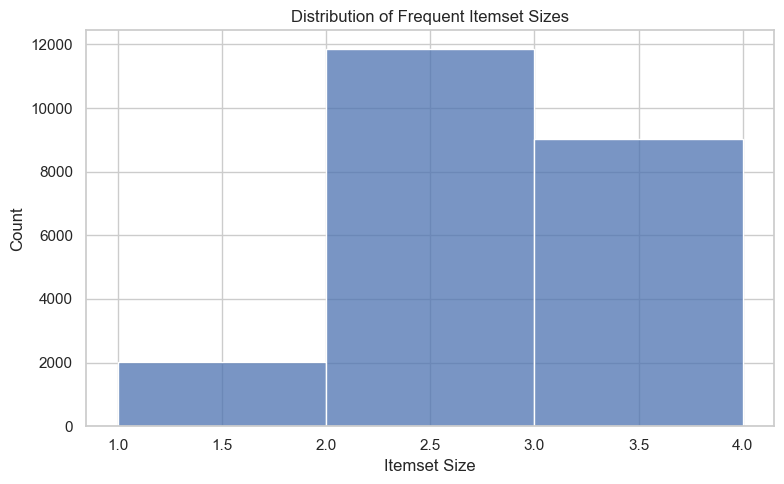

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(frequent_itemsets["length"], bins=[1,2,3,4], kde=False)
plt.title("Distribution of Frequent Itemset Sizes")
plt.xlabel("Itemset Size")
plt.ylabel("Count")
plt.tight_layout()

plt.savefig("../reports/figures/frequent_itemset_sizes.png")
plt.show()